# Evaluation of models trained on NW

Evaluation of models trained on NW sample of chips

In [1]:
import json
import glob

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import urbangrammar_graphics as ugg

In [2]:
path = "../../urbangrammar_samba/spatial_signatures/ai/nw_*/json/"

In [3]:
results = glob.glob(path + "*")

In [4]:
with open(results[0], "r") as f:
    result = json.load(f)

In [5]:
[i for i in result if "meta" in i]

['meta_n_class', 'meta_class_map', 'meta_class_names', 'meta_chip_size']

In [8]:
names = [i[58:-5] + "_" + i[50:52] for i in results]

In [9]:
names

['efficientnet_pooling_256_3_16',
 'vgg19_pooling_256_3_16',
 'efficientnet_flatten_128_3_32',
 'efficientnet_flatten_256_3_32',
 'efficientnet_flatten_512_3_32',
 'efficientnet_pooling_128_3_32',
 'efficientnet_pooling_256_3_32',
 'efficientnet_pooling_512_3_32',
 'resnet50_flatten_128_3_32',
 'resnet50_flatten_256_3_32',
 'resnet50_flatten_512_3_32',
 'resnet50_pooling_128_3_32',
 'resnet50_pooling_256_3_32',
 'resnet50_pooling_512_3_32',
 'vgg19_flatten_128_3_32',
 'vgg19_flatten_256_3_32',
 'vgg19_flatten_512_3_32',
 'vgg19_pooling_128_3_32',
 'vgg19_pooling_256_3_32',
 'vgg19_pooling_512_3_32',
 'efficientnet_pooling_256_3_64',
 'vgg19_pooling_256_3_64',
 'efficientnet_pooling_256_3_08',
 'vgg19_pooling_256_3_08']

In [10]:
accuracy = pd.DataFrame(columns=["global"] + result["meta_class_names"], index=pd.MultiIndex.from_product([names, ["train", "val", "secret"]]))

In [11]:
for r in results:
    with open(r, "r") as f:
        result = json.load(f)
    
    accuracy.loc[(result["model_name"]+ "_" + r[50:52], "train")] = [result["perf_model_accuracy_train"]] + result["perf_within_class_accuracy_train"]
    accuracy.loc[(result["model_name"]+ "_" + r[50:52], "val")] = [result["perf_model_accuracy_val"]] + result["perf_within_class_accuracy_val"]
    accuracy.loc[(result["model_name"]+ "_" + r[50:52], "secret")] = [result["perf_model_accuracy_secret"]] + result["perf_within_class_accuracy_secret"]


In [22]:
sns.set_theme(style="white")

In [13]:
accuracy

global   centres periphery countryside
efficientnet_pooling_256_3_16 train   0.690413  0.667913  0.696415    0.687406
                              val     0.681598  0.462719  0.688869     0.68674
                              secret  0.679615  0.502315  0.685129    0.683583
vgg19_pooling_256_3_16        train    0.71285  0.683562  0.715533    0.713139
                              val     0.687897  0.400832  0.688503    0.709091
...                                        ...       ...       ...         ...
efficientnet_pooling_256_3_08 val      0.57277  0.608934  0.388869    0.630643
                              secret  0.574561  0.602028  0.408942     0.63112
vgg19_pooling_256_3_08        train   0.594761  0.616865   0.43194    0.642681
                              val      0.58644  0.606706  0.405567    0.644179
                              secret  0.584357  0.602026  0.418351    0.638548

[72 rows x 4 columns]

<AxesSubplot:title={'center':'train'}>

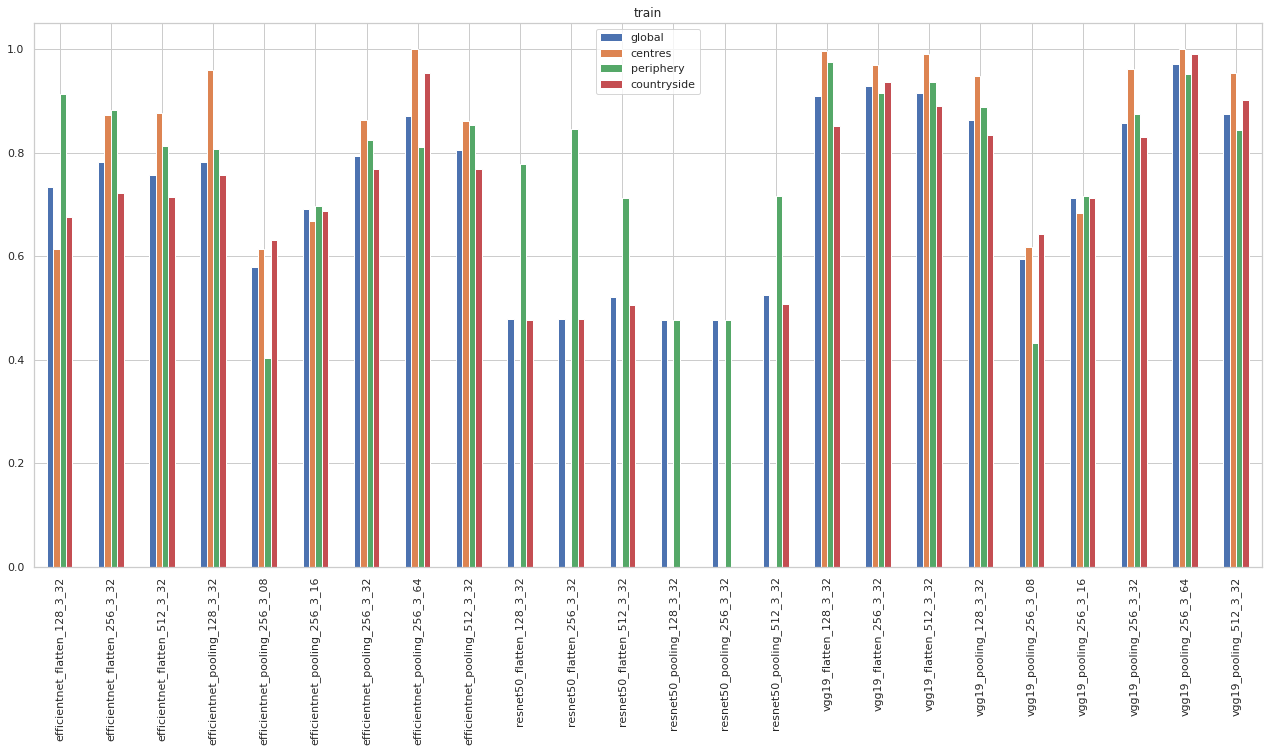

In [14]:
accuracy.xs('train', level=1).sort_index().plot.bar(figsize=(22, 10), title="train")

<AxesSubplot:title={'center':'validation'}>

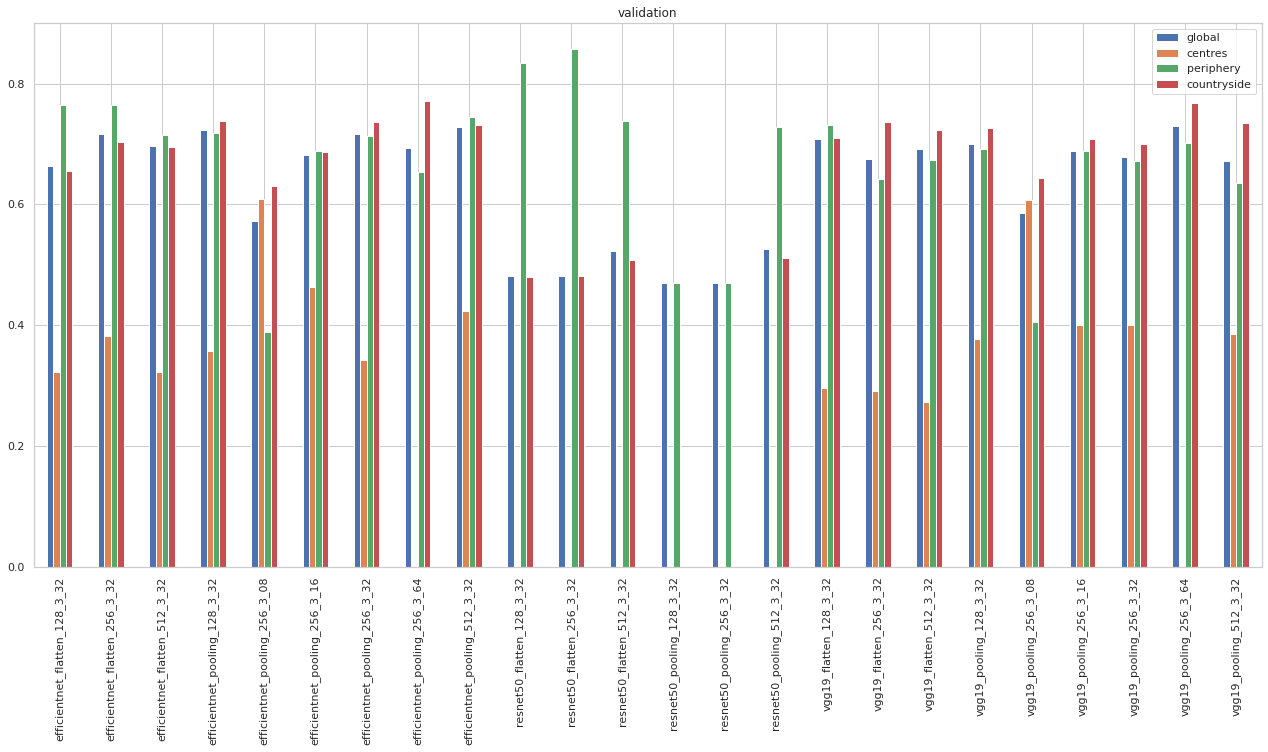

In [15]:
accuracy.xs('val', level=1).sort_index().plot.bar(figsize=(22, 10), title="validation")

<AxesSubplot:title={'center':'secret'}>

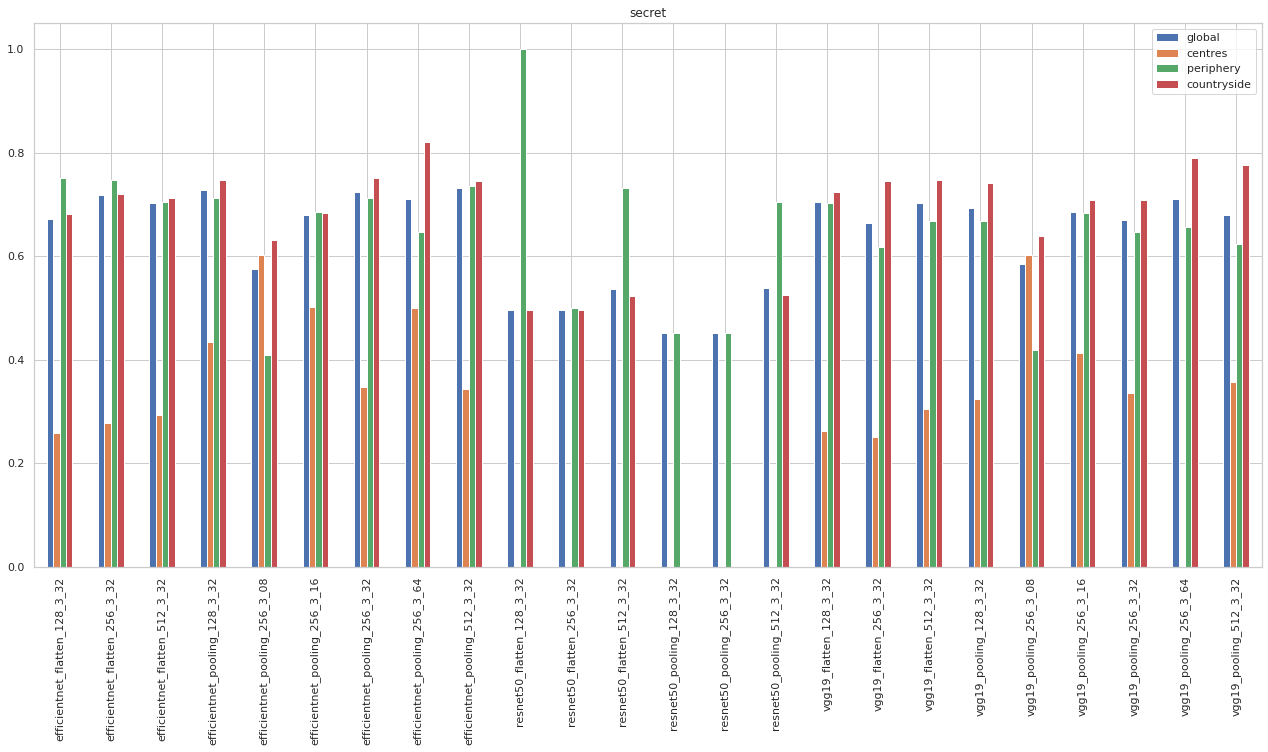

In [68]:
accuracy.xs('secret', level=1).sort_index().plot.bar(figsize=(22, 10), title="secret")

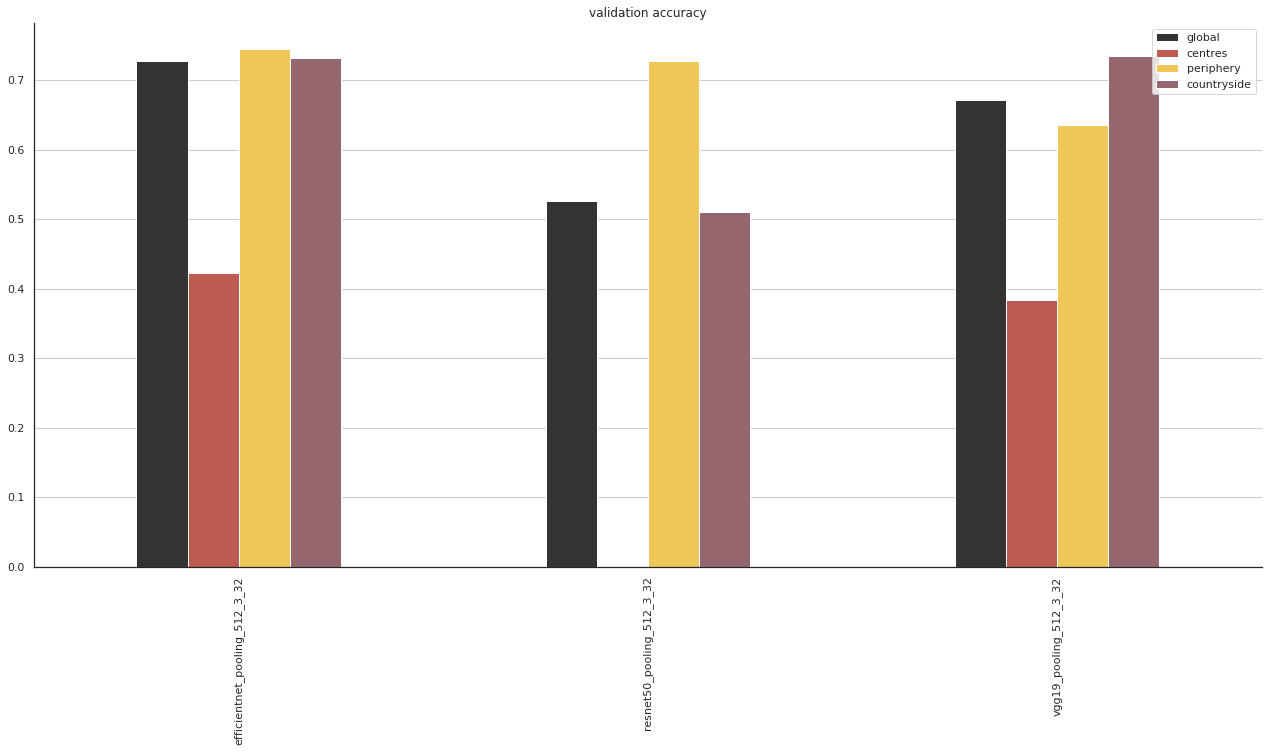

In [32]:
ax = accuracy.xs('val', level=1)[accuracy.xs('val', level=1).index.str.contains("pooling_512_3_32")].sort_index().plot.bar(figsize=(22, 10), title="validation accuracy", cmap=ugg.CMAP)
sns.despine()
ax.grid(axis='y')
plt.savefig("figs/comp1.pdf")

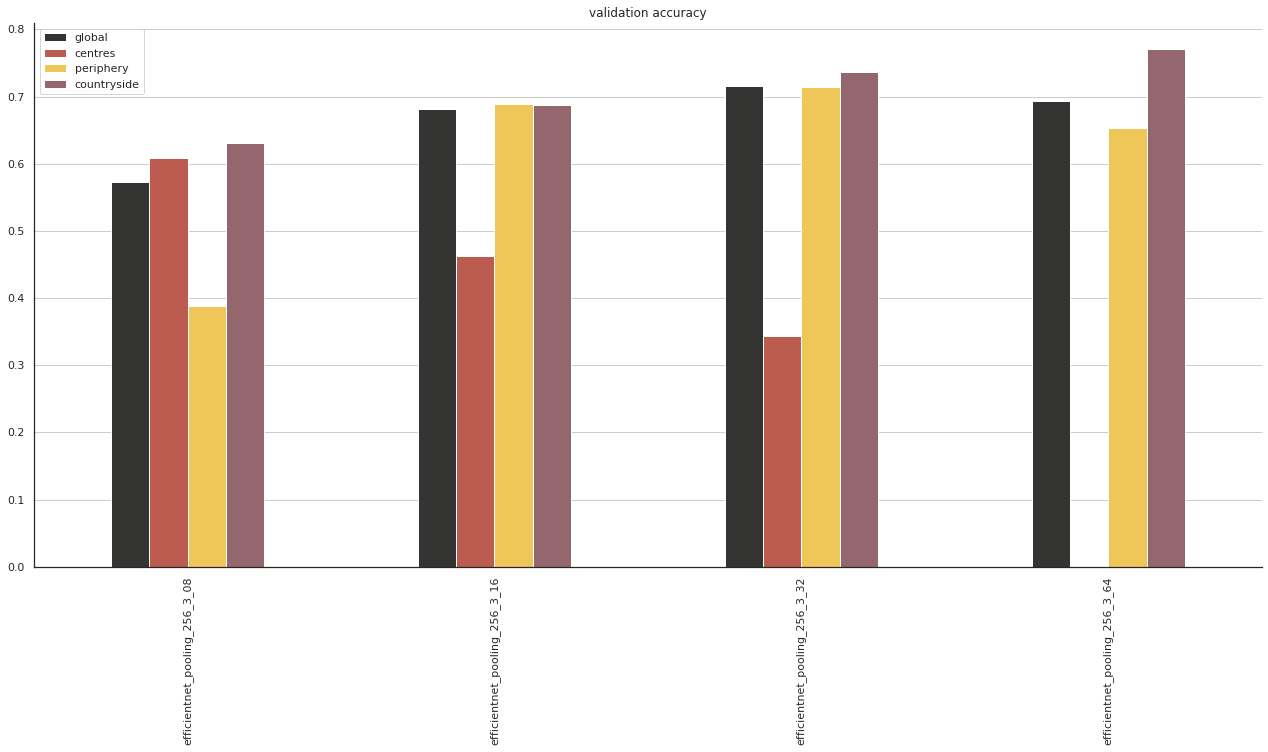

In [34]:
ax = accuracy.xs('val', level=1)[accuracy.xs('val', level=1).index.str.contains("efficientnet_pooling_256_3")].sort_index().plot.bar(figsize=(22, 10), title="validation accuracy", cmap=ugg.CMAP)
sns.despine()
ax.grid(axis='y')
plt.savefig("figs/comp2.pdf")

## regression

In [84]:
regr_input = pd.DataFrame(columns=["global_validation_acc", "global_secret_acc", "architecture", "top_layer", "neurons", "chip_size"], index=names)

In [95]:
for r in results:
    with open(r, "r") as f:
        result = json.load(f)
        
    regr_input.loc[result["model_name"]+ "_" + r[47:49]] = [result["perf_model_accuracy_val"], result["perf_model_accuracy_secret"], result["model_name"][:-14], result["model_bridge"], result["model_toplayer"], result['meta_chip_size']]

In [101]:
regr_input

,global_validation_acc,global_secret_acc,architecture,top_layer,neurons,chip_size
efficientnet_pooling_256_3_08,0.57277,0.574561,efficientnet,pooling,256,8
vgg19_pooling_256_3_08,0.58644,0.584357,vgg19,pooling,256,8
efficientnet_pooling_256_3_64,0.693069,0.710526,efficientnet,pooling,256,64
vgg19_pooling_256_3_64,0.729373,0.710526,vgg19,pooling,256,64
efficientnet_pooling_256_3_16,0.681598,0.679615,efficientnet,pooling,256,16
vgg19_pooling_256_3_16,0.687897,0.685506,vgg19,pooling,256,16
efficientnet_pooling_256_3_32,0.715764,0.723534,efficientnet,pooling,256,32
resnet50_pooling_512_3_32,0.526274,0.538339,resnet50,pooling,512,32
resnet50_flatten_128_3_32,0.481157,0.495888,resnet50,flatten,128,32
resnet50_pooling_128_3_32,0.469745,0.451844,resnet50,pooling,128,32


In [114]:
import statsmodels.api as sm

In [185]:
model = sm.OLS(regr_input.global_validation_acc.values.astype(float), sm.add_constant(pd.get_dummies(regr_input[["architecture", "top_layer", "neurons", "chip_size"]], drop_first=True)))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     46.59
Date:                Fri, 14 Jan 2022   Prob (F-statistic):           3.25e-09
Time:                        16:30:06   Log-Likelihood:                 62.322
No. Observations:                  24   AIC:                            -106.6
Df Residuals:                      15   BIC:                            -96.04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.5795      0.024     24.103      0.000       0.528       0.631
architecture_resnet50    -0.2091      0.013    -16.583      0.000      -0.236      -0.182
architecture_vgg19       -0.0068      0.011     -0.636      0.534      -0.030       0.016
top_layer_pooling         0.0051      0.011      0.472      0.644      -0.018       0.028
neurons_256              -0.0015      0.013     -0.114      0.911      -0.030       0.027
neurons_512               0.0155      0.013      1.176      0.258      -0.013       0.044
chip_size_16              0.1051      0.023      4.610      0.000       0.057       0.154
chip_size_32              0.1143      0.020      5.785      0.000       0.072       0.156
chip_size_64              0.1316      0.023      5.771      0.000       0.083       0.180
==============================================================================
Omnibus:                        3.305   Durbin-Watson:                   2.601
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.427
Skew:                          -0.159   Prob(JB):                        0.490
Kurtosis:                       1.848   Cond. No.                         12.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""